In [1]:
from jupyterthemes.stylefx import set_nb_theme

In [2]:
set_nb_theme('chesterish')

## **Working of the Model**


* `Multiple Images will take multiple images as input, and train it with unknown data (anonymous)`
* `Deep Learning Model`
* `Prediction of what the image is doing. (Input image size is 28 x 28)`
* `We would create .H5 Binary file  (HDF - Hierarchical Data File) for our model, use for application purpose. HDF5 lets you store huge amounts of numerical data`

In [3]:
import matplotlib.pyplot as plt

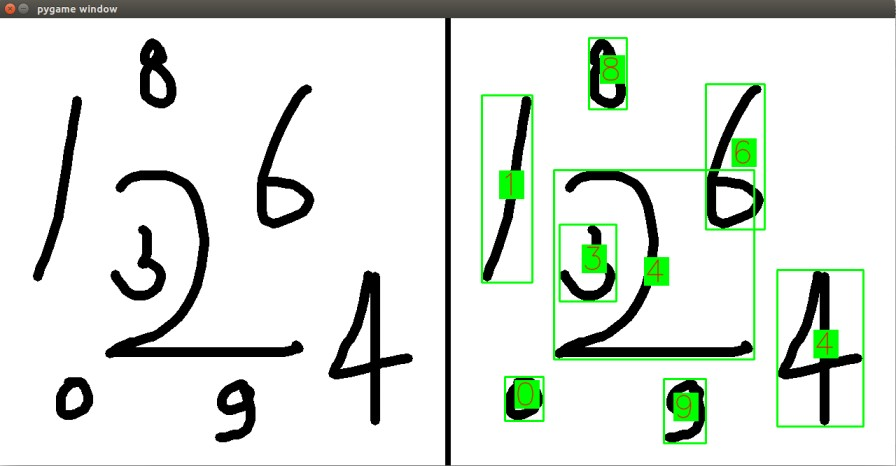

In [4]:
plt.rcParams['figure.figsize'] = (30,10)

In [5]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Load MnistData

df = mnist.load_data()

In [7]:
(X_train, y_train), (X_test, y_test) = df

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train = X_train.reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

In [14]:
plt.rcParams['figure.figsize'] = (5,5)

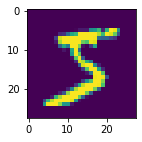

In [19]:
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.6)
plt.imshow(X_train[0])
plt.show()

**Above Number visually represent 5**

* Actual image is not in RGB color mode. Matplotlib is converting this
* Actual is in grey scale (black-white)

In [16]:
plt.rcParams['figure.figsize'] = (10,10)

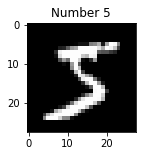

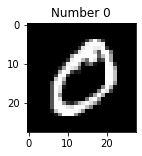

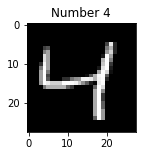

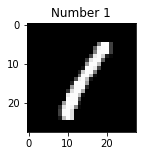

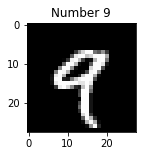

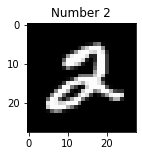

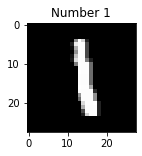

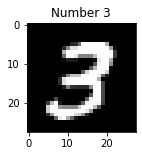

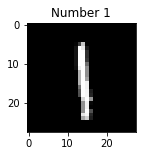

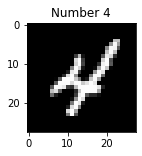

In [20]:
for i in range(10):
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(0.6)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(f'Number {y_train[i]}')
    plt.show()

**Model Creation**

In [21]:
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten #Layers
from keras.models import Sequential

In [22]:
num_model = Sequential()


* `Filters -- no of filter layers`
* `Size of filter (kernel) like 3x3 or 5x5`
* `Input image size is 28 x 28 x 1 (1 is for Non RGB Img)`
* `activation function = relu/sig`

**LAYER 1**

In [23]:
#Conv2D performs an elementwise multiplication. it will be summing up the results into a single output pixel
num_model.add(Conv2D(filters = 4, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'))

In [24]:
#Average Pooling (decrease dimensions of the data)
num_model.add(AveragePooling2D(pool_size = (2,2)))

**OTHER LAYERS**

In [25]:
num_model.add(Conv2D(filters = 4, kernel_size=(7,7), activation='relu'))
num_model.add(AveragePooling2D(pool_size = (2,2)))

In [26]:
#Flatten layer to flatten the 2D in single large vector
num_model.add(Flatten())

#classification operations for dense layers
num_model.add(Dense(units=10, activation = 'softmax')) #range of numbers (0-9)

In [27]:
num_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [28]:
num_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 4)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 4)           788       
                                                                 
 average_pooling2d_1 (Averag  (None, 3, 3, 4)          0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 36)                0         
                                                                 
 dense (Dense)               (None, 10)                3

**Train MODEL**

In [29]:
#Defining in batches of 6000
num_model.fit(X_train, y_train, epochs=3, batch_size=10)

Epoch 1/3
6000/6000 [==============================] - 97s 16ms/step - loss: 0.6308 - acc: 0.8264
Epoch 2/3
6000/6000 [==============================] - 93s 15ms/step - loss: 0.1536 - acc: 0.9532
Epoch 3/3
6000/6000 [==============================] - 91s 15ms/step - loss: 0.1276 - acc: 0.9612


**Test MODEL**

In [30]:
import cv2
import pandas as pd

In [31]:
img = cv2.imread("C:\\Users\\KIIT\\OneDrive\\Documents\Analytics and ML\\OpenCV Img Processing\\Test_image(6).jpg")


In [32]:
img.shape

(391, 391, 3)

In [34]:
cv2.imshow('img', img)
cv2.waitKey(0)

-1

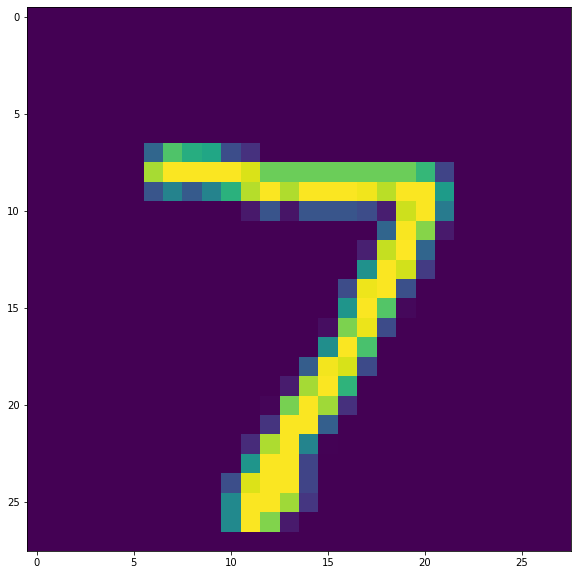

In [34]:
plt.imshow(X_test[0])
plt.figure

In [36]:
pred=num_model.predict(X_test[0].reshape(-1,28,28,1)) 
classes_x=np.argmax(pred,axis=1)

1/1 [==============================] - 0s 144ms/step


In [37]:
classes_x

array([7], dtype=int64)

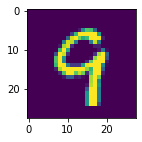

In [38]:
plt.imshow(X_test[150])

In [39]:
pred=num_model.predict(X_test[150].reshape(-1,28,28,1)) 
class_=np.argmax(pred,axis=1)
class_

1/1 [==============================] - 0s 28ms/step


array([9], dtype=int64)

**Keras to save the model**

In [30]:
num_model.save("./My_Digit_Recog.h5")